In [1]:
import math
import pandas as pd 
import seaborn as sns
import pandas_datareader as data
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447999
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.490866


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.330002
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.289993
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.380005
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,178.199997
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.570007


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447999
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.490866


In [5]:
df = df.drop(['Date','Adj Close'] , axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


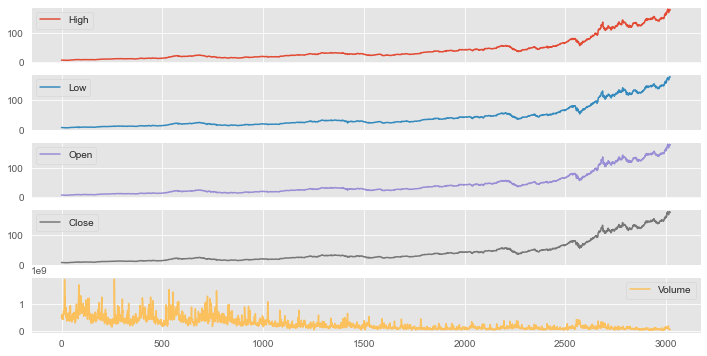

In [6]:
df.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

In [7]:
df

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
3016,180.419998,177.070007,177.089996,180.330002,74919600.0
3017,181.330002,178.529999,180.160004,179.289993,79144300.0
3018,180.630005,178.139999,179.330002,179.380005,62348900.0
3019,180.570007,178.089996,179.470001,178.199997,59773000.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
3020    154.6399
Name: Close, Length: 3021, dtype: float64

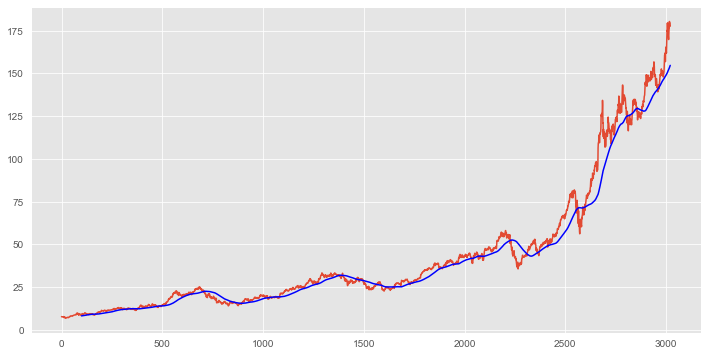

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'b')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3016    142.85570
3017    143.13220
3018    143.40125
3019    143.66845
3020    143.95365
Name: Close, Length: 3021, dtype: float64

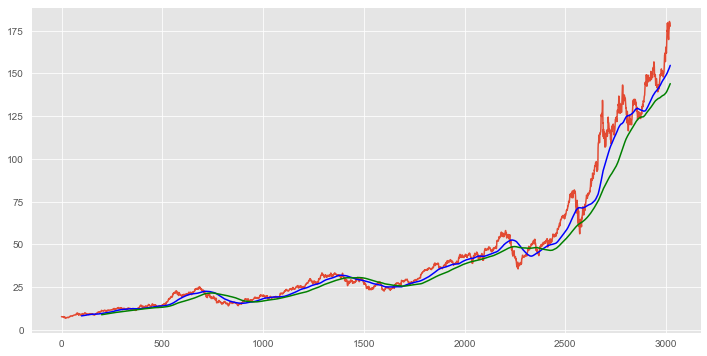

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'b')
plt.plot(ma200,'g')

In [12]:
df.shape


(3021, 5)

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2335
584


In [46]:
train_X

array([[[[ 0.        ],
         [ 0.00263852],
         [-0.01187335],
         ...,
         [-0.16273725],
         [-0.15354498],
         [-0.16588646]]],


       [[[ 0.        ],
         [-0.01447368],
         [-0.00819185],
         ...,
         [-0.1557725 ],
         [-0.16808149],
         [-0.20628183]]],


       [[[ 0.        ],
         [ 0.00637409],
         [ 0.00047375],
         ...,
         [-0.15586373],
         [-0.19462509],
         [-0.16915026]]],


       ...,


       [[[ 0.        ],
         [ 0.01167315],
         [ 0.02013196],
         ...,
         [ 0.22382   ],
         [ 0.21468449],
         [ 0.2011504 ]]],


       [[[ 0.        ],
         [ 0.0083612 ],
         [ 0.02341137],
         ...,
         [ 0.2006689 ],
         [ 0.18729097],
         [ 0.19698997]]],


       [[[ 0.        ],
         [ 0.01492537],
         [ 0.0185738 ],
         ...,
         [ 0.1774461 ],
         [ 0.18706468],
         [ 0.18225539]]]])

In [15]:
test_X

array([[[[ 0.        ],
         [-0.02256169],
         [-0.02245964],
         ...,
         [ 0.03693932],
         [ 0.01218268],
         [ 0.01786565]]],


       [[[ 0.        ],
         [ 0.0153931 ],
         [-0.00488737],
         ...,
         [-0.22203438],
         [-0.19841953],
         [-0.17781937]]],


       [[[ 0.        ],
         [-0.01325882],
         [ 0.00805196],
         ...,
         [ 0.01127278],
         [ 0.02259921],
         [ 0.01991522]]],


       ...,


       [[[ 0.        ],
         [-0.02041748],
         [ 0.00931737],
         ...,
         [ 0.20141488],
         [ 0.19330535],
         [ 0.19894181]]],


       [[[ 0.        ],
         [-0.0167027 ],
         [-0.01709981],
         ...,
         [ 0.12918675],
         [ 0.16148898],
         [ 0.14513919]]],


       [[[ 0.        ],
         [ 0.00190033],
         [-0.01442514],
         ...,
         [ 0.14286949],
         [ 0.16144088],
         [ 0.12429824]]]])

In [16]:
 # ML Model

import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from keras.layers import deserialize as layer_from_config
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()


# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
# adding layer(here we can play as we want )
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
#finish all layers
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))


# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
58/59 [============================>.] - ETA: 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0896WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F3DFD3E558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

59/59 [==============================] - 2s 31ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0362 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0355
Epoch 40/40
59/59 [==============================] - 2s 31ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0343 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0363


In [17]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [18]:
model.evaluate(test_X, test_Y)

19/19 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0363


[0.0022102855145931244, 0.0022102855145931244, 0.03627515584230423]

In [19]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Variance: 0.941505
R2 Score: 0.941505
Max Error: 0.221404


In [20]:
model.save('price.h5')

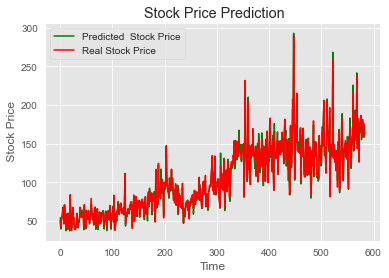

In [22]:
# making prediction
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - lenplt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()_t] = predicted[j - len_t] * temp + temp


In [23]:
new_model = tf.keras.models.load_model("price.h5")

In [24]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [42]:


data2 = pd.read_csv('C:/Users/Developer/Desktop/yousef douba project/data/SBIN.csv')

data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(df.mean(), inplace=True)
data2.head()
df2 = data2.drop('date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
   
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

     Symbol Series  Prev Close     Open     High      Low     Last    Close  \
0      SBIN     EQ     2297.95  2308.80  2337.00  2301.00  2333.00  2329.20   
1      SBIN     EQ     2329.20  2308.00  2349.80  2294.00  2331.00  2334.20   
2      SBIN     EQ     2334.20  2334.70  2356.00  2301.00  2319.00  2312.50   
3      SBIN     EQ     2312.50  2303.00  2321.90  2272.40  2319.00  2317.15   
4      SBIN     EQ     2317.15  2313.40  2336.70  2305.10  2313.00  2320.10   
...     ...    ...         ...      ...      ...      ...      ...      ...   
2451   SBIN     EQ      336.45   339.25   347.45   339.25   344.80   344.30   
2452   SBIN     EQ      344.30   344.00   354.95   342.40   354.20   353.05   
2453   SBIN     EQ      353.05   357.00   364.30   356.05   362.90   363.40   
2454   SBIN     EQ      363.40   365.00   369.95   355.50   357.45   359.40   
2455   SBIN     EQ      359.40   353.45   362.50   350.45   352.30   353.50   

         VWAP    Volume      Turnover    Trades  De

In [43]:
model.evaluate(test_X, test_Y)

15/15 [==============================] - 0s 5ms/step - loss: 0.0223 - mse: 0.0223 - mae: 0.1011


[0.02229759283363819, 0.02229759283363819, 0.10113700479269028]

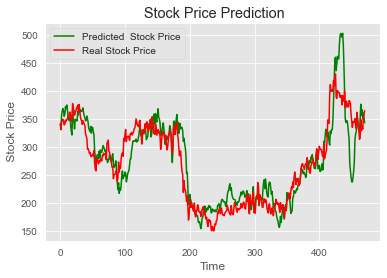

In [44]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()